<a href="https://colab.research.google.com/github/DanielFernandoMC/Prueba-T-cnica-Tuya-S.A./blob/main/Modelo_Segmentaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_excel("/Segmentacion_CATT.xlsx", sheet_name='Segmentación')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   negocio                     144 non-null    object 
 1   region                      144 non-null    object 
 2   canal                       144 non-null    int64  
 3   capturas_tarjetas           144 non-null    float64
 4   aprobacion_tarjetas         141 non-null    float64
 5   tarjetas                    144 non-null    float64
 6   capturas_creditos           144 non-null    float64
 7   aprobacion_creditos         141 non-null    float64
 8   cantidad_creditos           144 non-null    float64
 9   monto_creditos              144 non-null    float64
 10  seguros                     144 non-null    float64
 11  trafico_transaccional       144 non-null    float64
 12  trafico_clientes            144 non-null    float64
 13  aprovechamiento_de_trafico  144 non

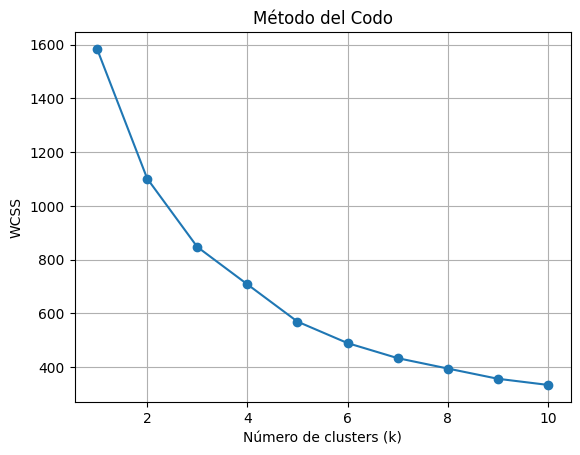

In [17]:
# Variables para clustering (Segmentación)
features = [
    'capturas_tarjetas', 'aprobacion_tarjetas', 'capturas_creditos',
    'aprobacion_creditos', 'cantidad_creditos', 'monto_creditos',
    'seguros', 'trafico_transaccional', 'trafico_clientes',
    'aprovechamiento_de_trafico', 'contribucion'
]

# Validar columnas y preparar datos nullos
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df[features] = df[features].fillna(df[features].mean())

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Método del codo
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Gráfico
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

In [18]:
# Elegir k óptimo
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Perfilamiento de clusters
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)

         capturas_tarjetas  aprobacion_tarjetas  capturas_creditos  \
cluster                                                              
0               822.342593             0.206199         298.574074   
1               829.287500             0.207713           0.006250   
2               498.694444             0.341432         106.750000   
3               292.680147             0.203775         105.797794   

         aprobacion_creditos  cantidad_creditos  monto_creditos     seguros  \
cluster                                                                       
0                   0.041964          30.074074       80.647816  171.592593   
1                   0.001785           0.000000        0.000000    0.000000   
2                   0.024433          12.472222       38.664036  105.333333   
3                   0.029460           7.871324       20.678309   52.503676   

         trafico_transaccional  trafico_clientes  aprovechamiento_de_trafico  \
cluster                 